In [34]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [35]:
# Load data from CSV file
data = pd.read_csv('C:/Users/ADMIN/Downloads/ACB-Historical-Data_Group 9.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,11361.0,11285.2,11398.8,11171.6,3910000,0.0101
1,3/4/2019,11512.4,11361.0,11550.3,11323.1,8240000,0.0133
2,3/5/2019,11474.6,11512.4,11626.0,11398.8,6510000,-0.0033
3,3/6/2019,11474.6,11436.7,11512.4,11361.0,3110000,0.0000
4,3/7/2019,11550.3,11512.4,11626.0,11474.6,8720000,0.0066
...,...,...,...,...,...,...,...
1242,2/26/2024,27500.0,27300.0,27700.0,27100.0,9790000,0.0000
1243,2/27/2024,27600.0,27700.0,27700.0,27350.0,12050000,0.0036
1244,2/28/2024,28000.0,27650.0,28000.0,27550.0,10460000,0.0145
1245,2/29/2024,28000.0,28100.0,28250.0,27700.0,9950000,0.0000


In [36]:

data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [37]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.153545
p-value: 0.693254
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


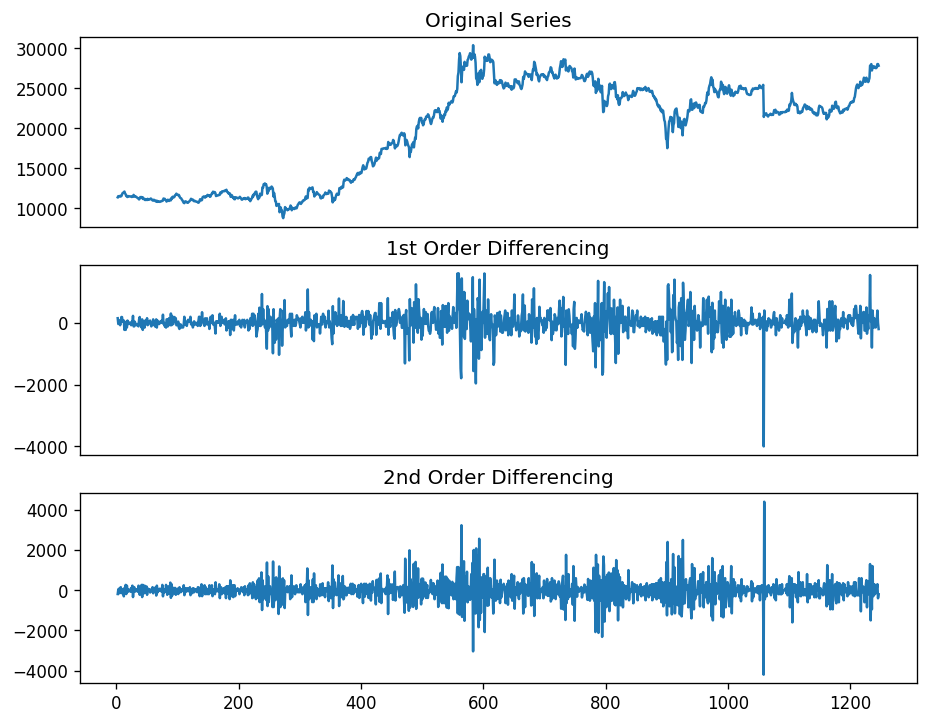

In [38]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Price']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data['Price'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data['Price'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


In [39]:
from statsmodels.tsa.stattools import acf

acf_values = acf(data['Price'].diff().dropna())

print("Autocorrelation Function (ACF) values:")
print(acf_values)


Autocorrelation Function (ACF) values:
[ 1.         -0.0134324   0.00517106 -0.05845545  0.00421011 -0.0408489
 -0.00585329  0.01217066 -0.01472721 -0.01588836 -0.00715854 -0.00285791
 -0.02596244 -0.00905007 -0.03119857 -0.03854681  0.01380609  0.01968457
  0.00702823 -0.07044324  0.02268704  0.01922074  0.00648623  0.00526116
  0.02163792  0.07506116  0.00689633  0.02542826 -0.06918799  0.01808545
  0.00462528]


In [40]:
N = len(acf_values)

z_score = 1.96  

# Tính toán ranh giới tin cậy
confidence_interval = z_score / np.sqrt(N)

# In ra ranh giới tin cậy
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: 0.3520263919724788


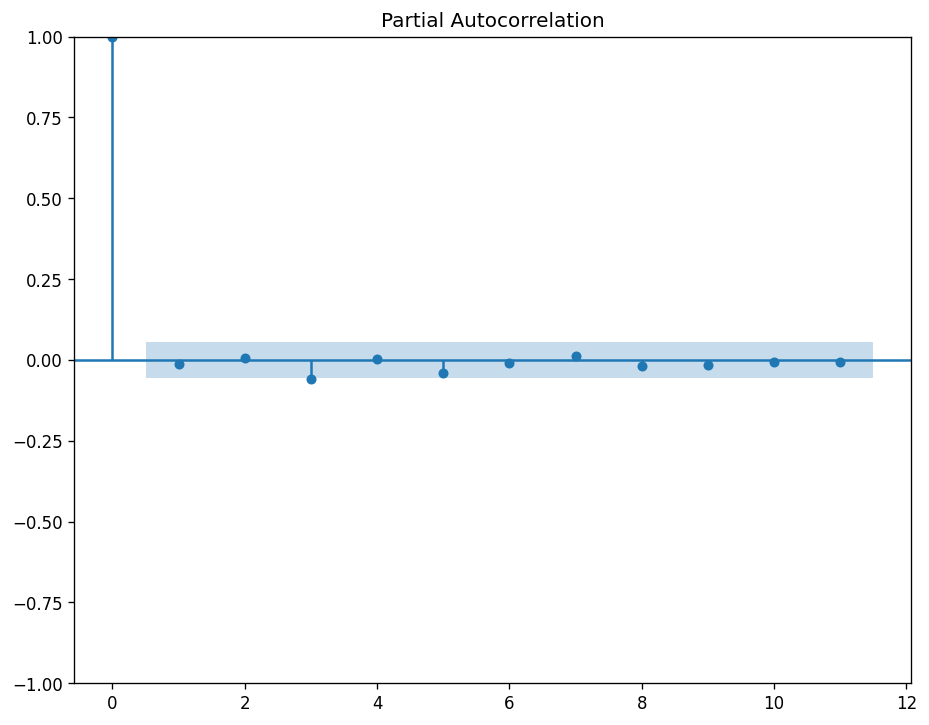

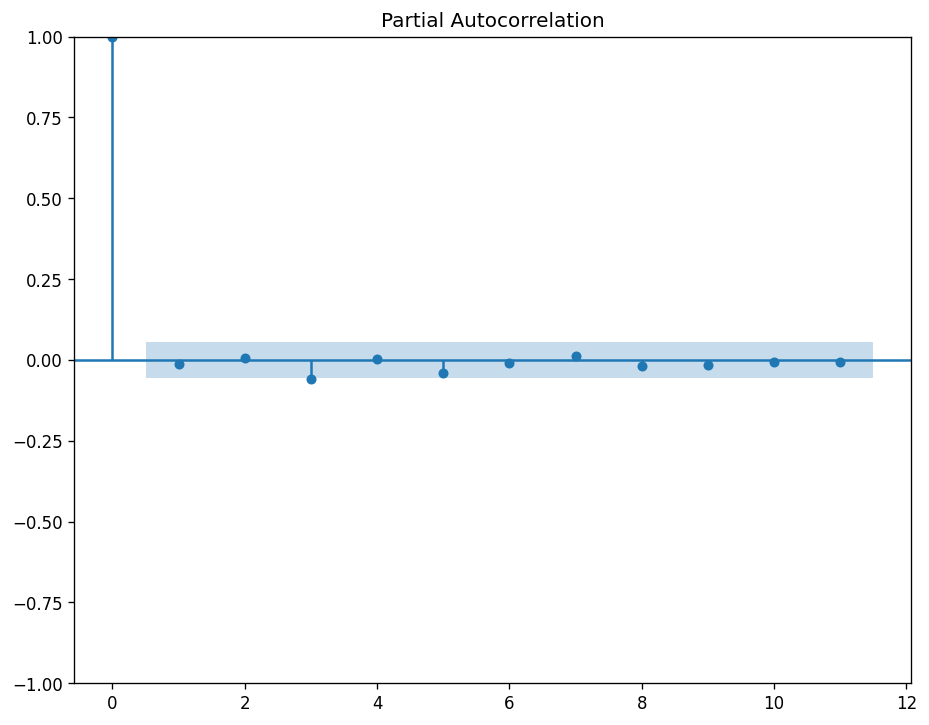

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Price'].diff().dropna(), lags=11)

In [42]:

df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.75 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [43]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=14310.003, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=14016.473, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=14311.941, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=13925.333, Time=1.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=13923.388, Time=1.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=14014.650, Time=0.16 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.79 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=13925.335, Time=0.95 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=6.35 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1392

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  935
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -6958.694
Date:                            Wed, 15 May 2024   AIC                          13923.388
Time:                                    21:16:50   BIC                          13937.868
Sample:                                         0   HQIC                         13928.913
                                            - 935                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6928      0.026    -27.101      0.000      -0.743      -0.643
ar.S.L24      -0.3170      0.028    -11.376      0.000      -0.372      -0.262
sigma2      2.072e+05   5878.329     35.252      0.000    1.96e+05    2.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               461.64
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.67   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [46]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
935    22605.558238
936    22597.680598
937    22703.395723
938    23536.583675
939    24040.352962
940    23858.501718
941    23663.083016
942    23040.221383
943    23399.531658
944    23450.170684
945    23111.777355
946    23345.625036
947    23834.743144
948    24088.223912
949    23748.987594
950    24525.182878
951    24940.060531
952    24715.725766
953    24306.352265
954    23640.659136
955    24022.279313
956    24375.416798
957    24285.013519
958    24400.951268
959    24938.427268
960    24854.834855
961    24409.948966
962    25373.608877
963    25896.426204
964    25790.871305
dtype: float64


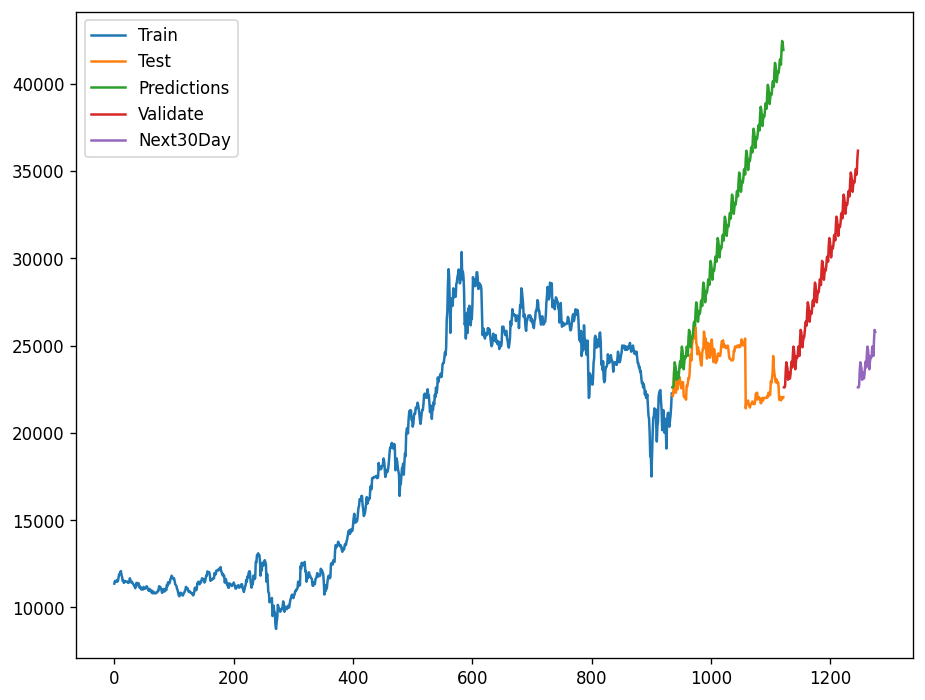

In [47]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [48]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 5747.517037854089
Testing RMSE: 10614.983068102465
Validation MAPE: 21.97355218180294
Testing MAPE: 37.32294419617813
Validation MDA: 45.16129032258064
Testing MDA: 44.086021505376344
